<a href="https://colab.research.google.com/github/Rumaisa1054/Data_Science/blob/main/stats_visuals/stats/skewness_curtosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **skewness : Asymmetry measure**

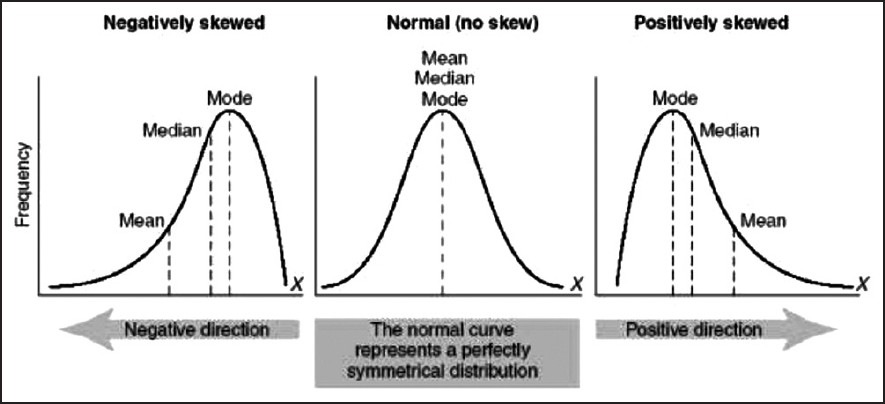

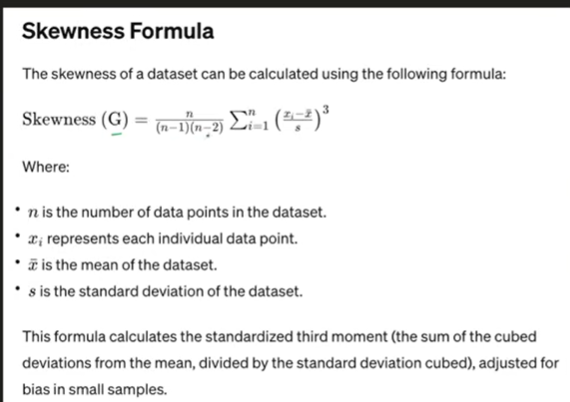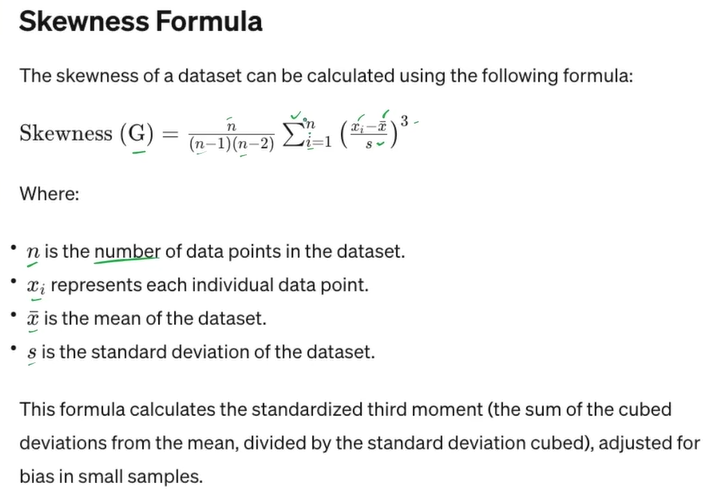

# **Kurtosis : tailedness measure**

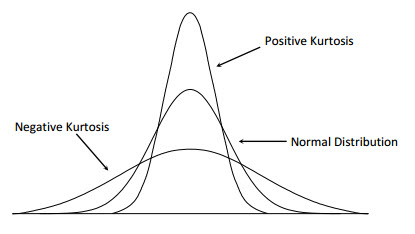

| Metric           | Meaning                      | What it tells us                      |
| ---------------- | ---------------------------- | ------------------------------------- |
| **Skewness = 0** | perfectly symmetric          | Normal-like distribution              |
| **Skewness > 0** | right/positive skew          | long tail on right, many small values |
| **Skewness < 0** | left/negative skew           | long tail on left                     |
| **Kurtosis = 3** | normal kurtosis (mesokurtic) | moderate tails                        |
| **Kurtosis > 3** | leptokurtic                  | heavy tails, many outliers            |
| **Kurtosis < 3** | platykurtic                  | light tails                           |


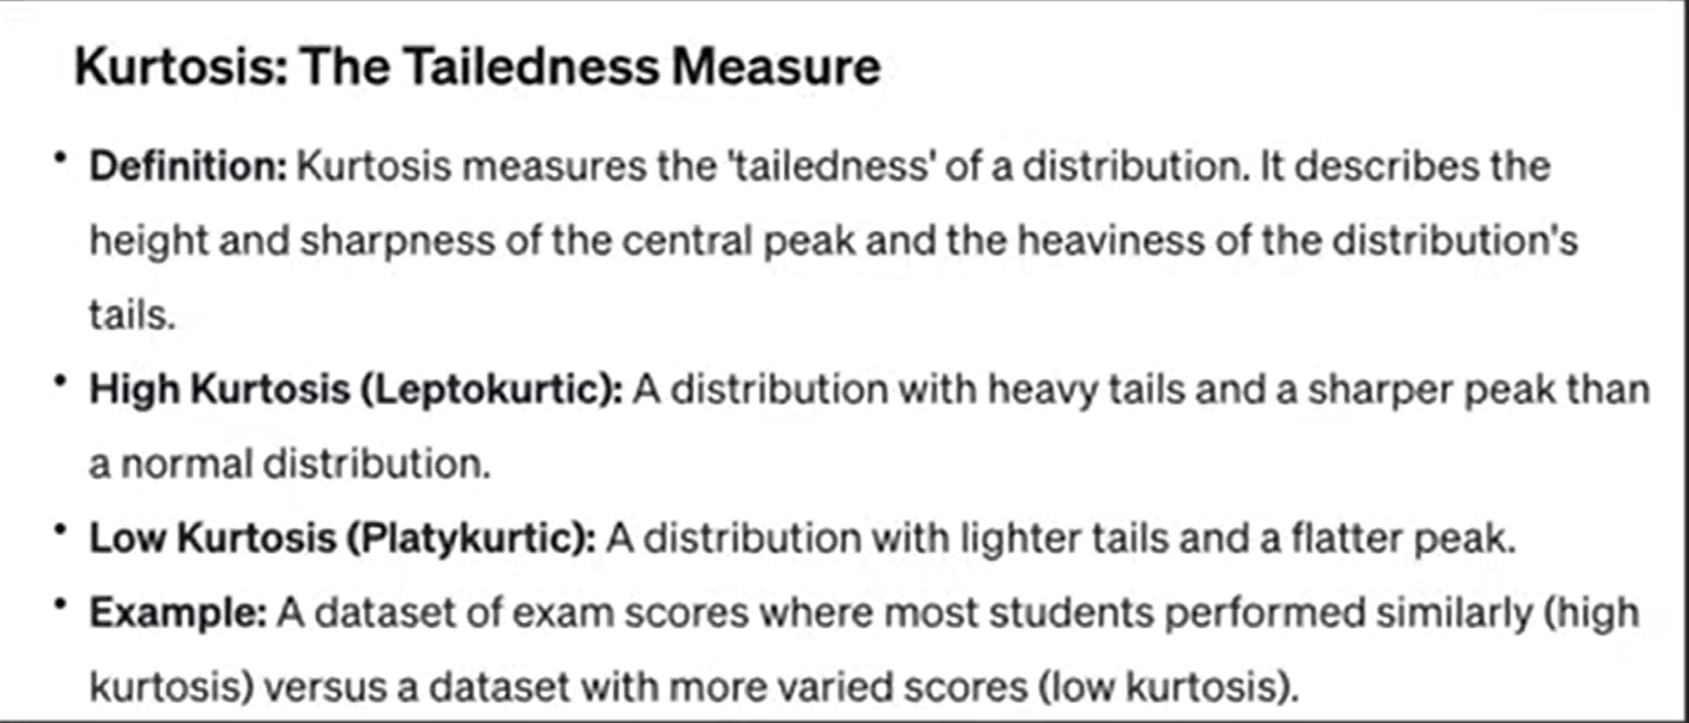

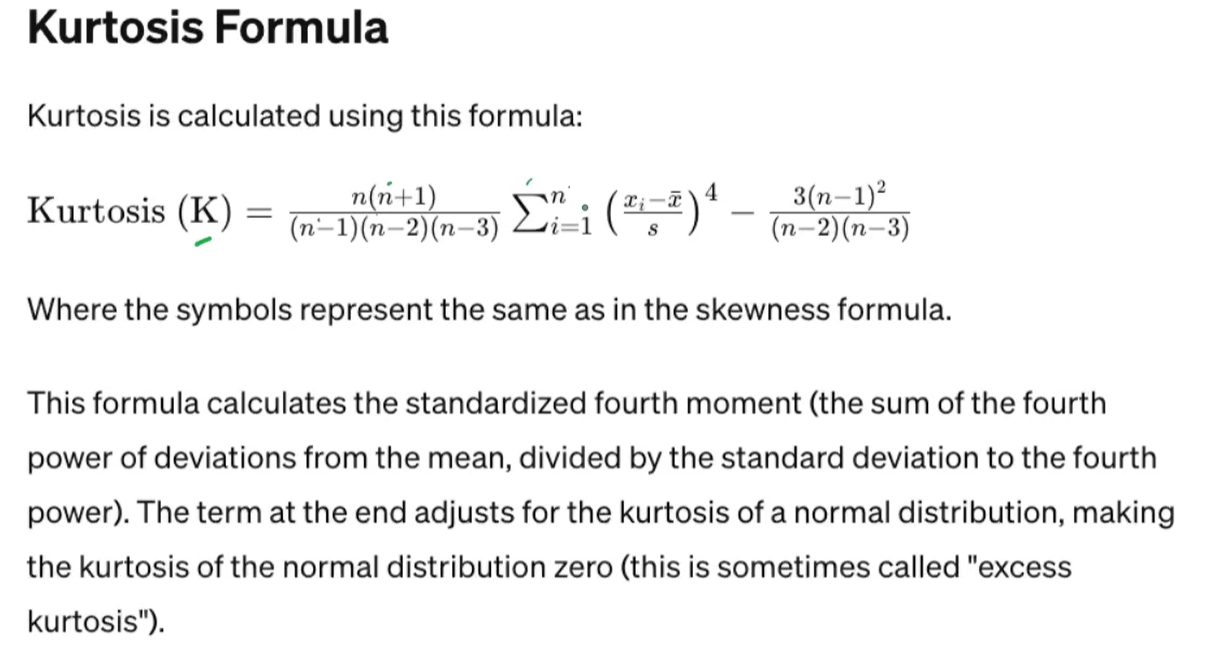

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('titanic')

In [2]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
import scipy.stats as stats
print(stats.skew(df['fare']))
print(stats.kurtosis(df['fare']))

4.7792532923723545
33.20428925264474


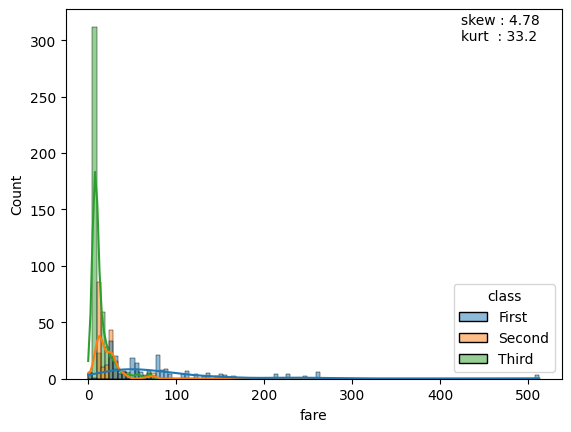

In [35]:
sns.histplot(df,x='fare',kde= True,hue = 'class')
skew = round(stats.skew(df['fare']),2)
kurt = round(stats.kurtosis(df["fare"]),2)
plt.text(424,300,f'skew : {skew}\nkurt  : {kurt}')
plt.show()

# **kurtosis and skewness of a normal dist**

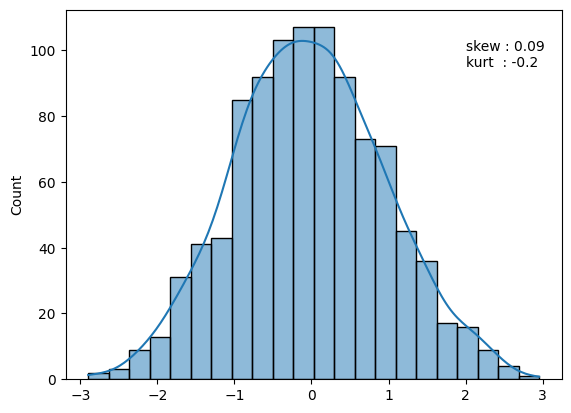

In [34]:
x = np.random.normal(loc = 0,scale = 1 , size = 1000)
sns.histplot(x=x,kde= True)
skew = round(stats.skew(x),2)
kurt = round(stats.kurtosis(x),2)
plt.text(2,95,f'skew : {skew}\nkurt  : {kurt}')
plt.show()

# **Test to check the normality of a data - SHapiro Test**

In [ ]:
# H0 : Data is normally distributed
# H1 : data is not normally distributed

# Shapiro wilk test
# D'Agostino's k_square test
# Anderson Darling test


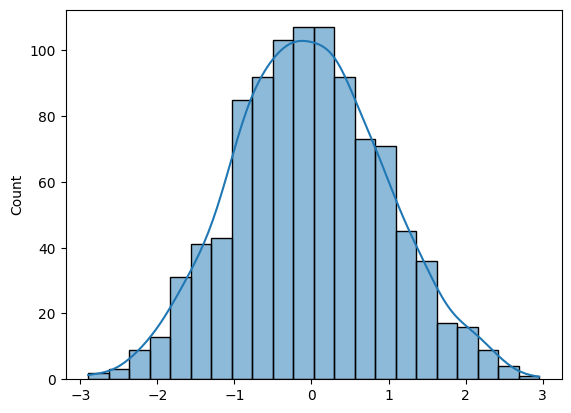

ShapiroResult(statistic=np.float64(0.9980960873088931), pvalue=np.float64(0.32523509408229545))
0.9980960873088931
0.32523509408229545
data is normally distributed


In [42]:
# H0 : Data is normally distributed
# H1 : data is not normally distributed

sns.histplot(x,kde=True)
plt.show()
print(stats.shapiro(x))
print(stats.shapiro(x).statistic)
print(stats.shapiro(x).pvalue)

if stats.shapiro(x).pvalue > 0.05:
  print("data is normally distributed")
else:
  print("data is not normally distributed")

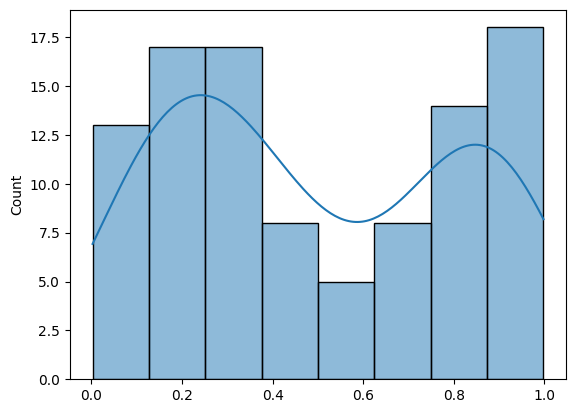

ShapiroResult(statistic=np.float64(0.916066801422698), pvalue=np.float64(8.757732392841684e-06))
0.916066801422698
8.757732392841684e-06
data is not normally distributed


In [43]:
# H0 : Data is normally distributed
# H1 : data is not normally distributed
x = np.random.uniform(size = 100)
sns.histplot(x,kde=True)
plt.show()
print(stats.shapiro(x))
print(stats.shapiro(x).statistic)
print(stats.shapiro(x).pvalue)

if stats.shapiro(x).pvalue > 0.05:
  print("data is normally distributed")
else:
  print("data is not normally distributed")

# **way to test normality of data**
1. plotting
2. shapiro test
3. kurtosis or skewness
4. Maybe one class data would be normal

# **skewness formula implemented**

In [6]:
n = len(df['fare'])
mean = df['fare'].mean()
std = df['fare'].std()
skew = df['fare'] - mean
skew = (skew  / std)**3
skew = skew.sum()
skew = skew * (n/(n-1))
skew = skew * (1/(n-2))
print(skew)

4.78731651967489


# **kurtosis formula implemented**

In [7]:
n = len(df['fare'])
mean = df['fare'].mean()
std = df['fare'].std()
kurt = df['fare'] - mean
kurt = ((kurt  / std)**4 )- (3*((n-1)**2))/(((n-2)*(n-3)))
kurt = kurt.sum()


kurt = kurt * n
kurt = kurt * (n + 1)
kurt = kurt * (1/(n-1))
kurt = kurt * (1/(n-2))
kurt = kurt * (1/(n-3))
print(kurt)

33.37437416920176


# **Kurtosis and nan**

In [14]:
import scipy.stats as stats
print(stats.kurtosis(df['fare'],fisher=False))
print(stats.kurtosis(df['age'],fisher=False)) # is nan
print("null in age",df['age'].isnull().sum()) # 177 values in age are missing - so kurtosis is giving nan
print("null in fare",df['fare'].isnull().sum())

36.20428925264474
nan
null in age 177
null in fare 0


# **What To Do After Checking Skewness & Kurtosis**

## 1. If **Skewness is High** (>|1|) → Fix Asymmetry

### ✔ Actions:
- Apply transformations:
  - For **positive skew**: `log(x)`, `sqrt(x)`, `x**0.25`, Box–Cox, Yeo–Johnson
  - For **negative skew**: `x**2`, `x**3`, or reflect + log
- Use **median** instead of mean
- Use **non-parametric tests** (Mann-Whitney, Kruskal)
- For ML:
  - Standardize data
  - Prefer **tree-based models** (RF, XGBoost)

---

## 2. If **Kurtosis is High** (>3) → Many Outliers

### ✔ Actions:
- Handle outliers:
  - Z-score cutoff (|z| > 3)
  - IQR method
  - Winsorizing / capping
- Use **robust statistics**:
  - Median  
  - MAD  
  - RobustScaler
- Apply **log/sqrt transformations**
- Use **outlier-resistant models**:
  - Random Forest  
  - Gradient Boosting  
  - Quantile Regression

---

## 3. **If Skewness & Kurtosis Are Normal** (≈0 and ≈3)

### ✔ Actions:
- Safe to use **parametric tests**
- Linear regression works well
- Mean & SD are reliable
- No transformation needed

---

## **Summary Table**

| Situation | What You Should Do |
|----------|--------------------|
| **High Skewness** | Transform data, use median, non-parametric tests, tree models |
| **High Kurtosis** | Remove/cap outliers, robust scaling, log transform |
| **Both Normal** | Proceed with parametric methods and linear models |
| **Mild Issues** | Standardization is usually enough |

---

## **One-Line Rule:**
- **Skewness → Fix shape**  
- **Kurtosis → Fix outliers**
